In [1]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np


2024-08-01 04:16:16.245590: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-01 04:16:16.281961: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 04:16:16.281993: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 04:16:16.282933: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-01 04:16:16.289062: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# 訓練用とテスト用のデータパスを設定する
train_data_path = '/home/jovyan/work/1/data/data/cats_and_dogs/train'
test_data_path = '/home/jovyan/work/1/data/data/cats_and_dogs/validation'


In [3]:
# ImageDataGeneratorを初期化
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
# データ生成器を作成
train_generator = train_datagen.flow_from_directory(directory=train_data_path,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(directory=test_data_path,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')
print(train_generator.class_indices)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}


In [5]:
# モデルを構築
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

2024-08-01 04:16:24.348352: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7910 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe MIG 1g.10gb, pci bus id: 0000:53:00.0, compute capability: 8.0


In [11]:
# データ生成器を作成
sgd = optimizers.SGD(learning_rate=0.1)

# モデルをコンパイル
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

# モデルを訓練
train_samples = train_generator.samples
test_samples = test_generator.samples

# .fitを使用
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // 32,  
    epochs=80,
    verbose=1,
    validation_data=test_generator,
    validation_steps=test_samples // 32  
)


# モデルを保存
model.save('model.h5')

Epoch 1/80
62/62 [==============================] - 5s 76ms/step - loss: 0.2455 - accuracy: 0.5645 - val_loss: 0.2430 - val_accuracy: 0.5847
Epoch 2/80
62/62 [==============================] - 5s 75ms/step - loss: 0.2393 - accuracy: 0.5915 - val_loss: 0.2345 - val_accuracy: 0.5776
Epoch 3/80
62/62 [==============================] - 5s 74ms/step - loss: 0.2358 - accuracy: 0.6072 - val_loss: 0.2239 - val_accuracy: 0.6613
Epoch 4/80
62/62 [==============================] - 5s 74ms/step - loss: 0.2334 - accuracy: 0.6082 - val_loss: 0.2338 - val_accuracy: 0.6200
Epoch 5/80
62/62 [==============================] - 5s 74ms/step - loss: 0.2248 - accuracy: 0.6326 - val_loss: 0.2241 - val_accuracy: 0.6300
Epoch 6/80
62/62 [==============================] - 5s 74ms/step - loss: 0.2204 - accuracy: 0.6514 - val_loss: 0.2172 - val_accuracy: 0.6542
Epoch 7/80
62/62 [==============================] - 5s 74ms/step - loss: 0.2113 - accuracy: 0.6621 - val_loss: 0.2108 - val_accuracy: 0.6804
Epoch 8/80
62

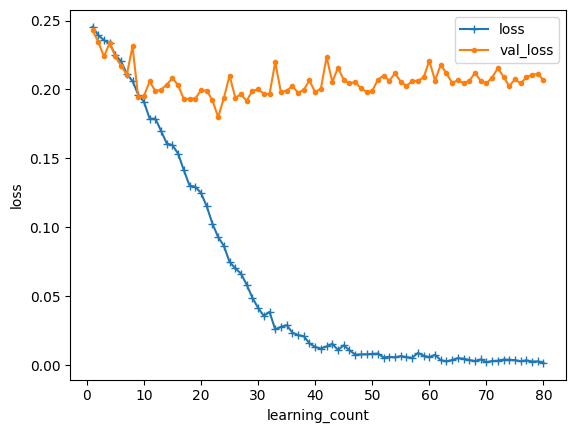

In [12]:
# 損失グラフを描画
loss = history.history['loss']
val_loss = history.history['val_loss']

learning_count = len(loss) + 1

plt.plot(range(1, learning_count),loss,marker='+',label='loss')
plt.plot(range(1, learning_count),val_loss,marker='.',label='val_loss')
plt.legend(loc = 'best', fontsize=10)
plt.xlabel('learning_count')
plt.ylabel('loss')
plt.show()

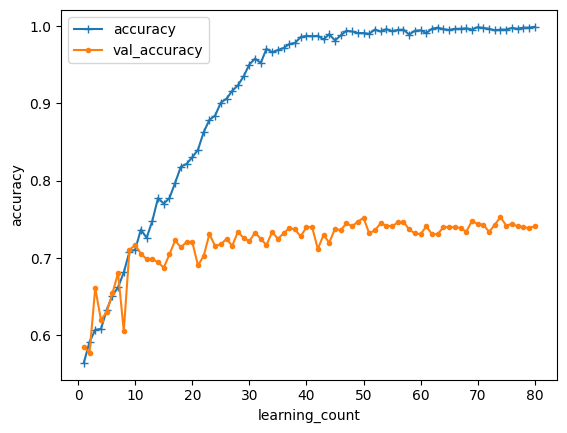

In [13]:
# 正確率グラフを描画
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(range(1, learning_count),accuracy,marker='+',label='accuracy')
plt.plot(range(1, learning_count),val_accuracy,marker='.',label='val_accuracy')
plt.legend(loc = 'best', fontsize=10)
plt.xlabel('learning_count')
plt.ylabel('accuracy')
plt.show()